<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

# Cel przedmiotu:

* prezentacja standardowych architektur używanych w uczeniu maszynowym
* zaprogramowanie w uczestnikach sprawności w używaniu pakietów oprogramowania używanych w uczeniu maszynowym

<br></br>
<br></br>

# Forma przedmiotu: warsztaty
* nacisk położony na uzyskanienie sprawności w używaniu pakietów oprogramowania używanych w uczeniu maszynowym
* część mówiona przez wykładowcę przeplatana z samodzielnymi ćwiczeniami

# Plan warsztatów:

* przygotowanie środowiska i rozgrzewka z programowania w Pythonie i analizy danych
* przypomnienie podstawowych pojęć w uczeniu maszynowym
* sieci w pełni połączone
* sieci konwolucyjne
* autokodery
* transfer modeli (ang. transfer learning)
* atencja
* 8
* 9
* 10
* 11
* 12
* 13
* 14

### Zasady zaliczania:

* obecność obowiązkowa - 2 nieusprawiedliwione nieobecności dozwolone.
  [Lista obecności]() na Kampus2
* obowiązkowe prace domowe po każdych zajęciach
* zaliczenie na podstawie samodzielnie wykonanego Projektu.
    * Projekt musi być wykonany w postaci czytelnego notatnika Jupyter
    * pliki Projektu muszą byćzaładowane na czas do Kampus2
    * dane wejściowe muszą być dostępne przez WWW: ogólnodostępne dane, lub dane umieszczone na dysku Google
    * Projekt musi być wykonany zgodnie z harmonogramem:
        * **25.03.2024**: definicja Projektu i konsultacja jego wykonywalności 
        * **14.04.2024**: notatnik z wstępną obróbką danych
        * **31.05.2024**: notatnik finalną wersją rozwiązania

### Infrastruktura:

* **Google Colaboratory** - chmura obliczeniowa:
    * minimalny narzut związany z instalacją
    * wygodny dostęp przez WWW 
    * ograniczona ilośc zasobów
    * nie skaluje się do zaawansowanych zastosowań

<br></br>
<br></br>
 
* **własna maszyna** - kontener:
    * wymaga pewnego wysiłku przy konfiguracji
    * pozwala na użycie włąsnych zasobów obliczeniowych
    * łatwy do przeniesienia na inne maszyny
    * standardowa technologia używania w IT

# Przygotowanie środowiska -  Google Colaboratory

**Proszę:**

* skorzystać z [linku]() w Kampus2 i otworzyć ten notatnik w Colab
* uruchomić maszynę wirtualną
* wyświetlić zużycie zasobów maszyny wirtualnej:

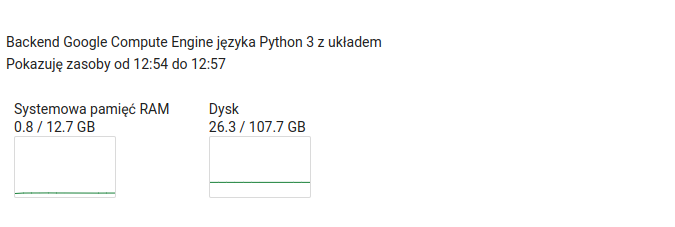

* zmienić typ środowiska wykonawczego na `GPU` i ponownie wyświetlić zużycie zasobów:

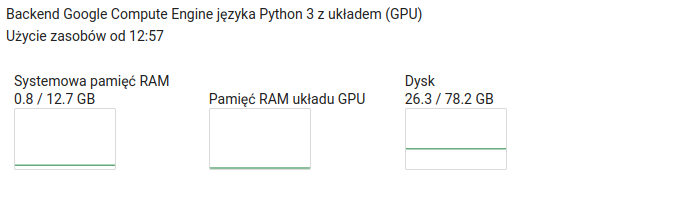

**Proszę**:

* zaimportować bibliotekę `tensorflow` pod nazwą `tf`
* wypisać na ekran:
    * wersję biblioteki zapisaną w polu `__version__`
    * wypisać liczbę dostępnych GPU:
      ```Python
      tf.config.list_physical_devices('GPU')
      ```
    * wypisać nazwę dostępnego GPU:
      ```Python
       tf.config.experimental.get_device_details(gpu_devices[0])
      ``` 

In [ ]:
#BEGIN_SOLUTION
import tensorflow as tf
print("TF version:",tf.__version__)
print(tf.config.list_physical_devices('GPU'))

gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
  details = tf.config.experimental.get_device_details(gpu_devices[0])
  print("GPU name:",details['device_name'])
#END_SOLUTION
pass

Korzystając z eksploratora plików w menu po lewej
**Proszę:**

* stworzyć katalog `data`
* pobrać [plik](https://docs.google.com/spreadsheets/d/e/2PACX-1vTWNYLoE3k3JegSt47hV66v5j7_Vh8jIdLRUhcMLrIAW4VcIZK-3W9rGoDSfnToUnCIb9DPngGAlgL6/pub?gid=0&single=true&output=csv) w formacie CSV i załadować go do katalogu `dane` jako `rowery.csv`
* wczytać plik i wypisać pierwszą linię 

In [ ]:
##BEGIN_SOLUTION
fileName = 'data/rowery.csv'
input_file = open(fileName, 'r')

for line in input_file:
    print(line)
    break
##END_SOLUTION
pass

**Proszę:**

* na swoim dysku Google utworzyć katalog `data_gdrive`
* umieścić plik `cvv.csv` pobrany wcześniej na swoim dysku Google w katalogu `data_gdrive`
* skonfigurować w Colab dostęp do dysku Google
* wczytać plik z dysku Google i wypisać pierwszą linię

In [ ]:
##BEGIN_SOLUTION
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/data/rowery.csv', 'r') as input_file:
  for line in input_file:
    print(line)
    break
##END_SOLUTION
pass

**Proszę:**

* wczytać plik `csv.csv` korzystając bezpośrednio z adresu URL:
  <br></br>
  ```
  https://dane.gov.pl/pl/dataset/2913,dane-pomiarowe-esa-edukacyjna-siec-antysmogowa
  ```
  <br></br>
* proszę użyć funkcji `read_csv` pakietu `pandas`
* proszę wypisać na ekran informację o wczytanych danych używając metody describe:
  <br></br>
  ```Python
  df.describe()
  ```

In [ ]:
#BEGIN_SOLUTION
import pandas as pd

file_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTWNYLoE3k3JegSt47hV66v5j7_Vh8jIdLRUhcMLrIAW4VcIZK-3W9rGoDSfnToUnCIb9DPngGAlgL6/pub?gid=0&single=true&output=csv'
df = pd.read_csv(file_url)
print(df.describe())

#END_SOLUTION
pass

# Powtórka podstawowych rachunków wektorowych i macierzowych w Pythonie

## Przygotowanie środowiska programistycznego

In [ ]:
import numpy as np

Natywnym typem zmiennych w `numpy` są tablice, czyli `array`.

Można je zadeklarować zarówno przez podanie listy własnych liczb, albo użyć metod generujących tablice z samymi zerami, jedynkami lub liczbami losowymi ze ustandardyzowanego rozkładu normalnego N(0,1).

**Proszę:**

* użyć dokumentacji pakietu numpy by stworzyć następujące tablice i wektory:
$$
\begin{array}{lcr}
\vec{v} = [0, 1,2,3,4,5,6,7,8,9] \\
\vec{v}_{0} = [0,0,...] \\
\vec{v}_{1} = [1,1,...] \\
\vec{v}_{rand} = [\mbox{losowa},\mbox{losowa}, ...]
\end{array}
$$
* wektory $\vec{v}_{0}, \vec{v}_{1}$ i $\vec{v}_{rand}$ powinny być  stworzone przy użyciu dedykowanych funkcji
* wymiar wektora powinien być podany przy użyciu jako zmiennej `vec_dim`

In [ ]:
#BEGIN_SOLUTION
v =  np.array([0,1,2,3,4,5,6,7,8,9])

vec_dim = 10

v0 = np.zeros(vec_dim) 
v1 = np.ones(vec_dim)
vrand = np.random.randn(vec_dim)
#END_SOLUTION

print("Vector of natural numbers: {}".format(v))
print("Vector of zeros: {}".format(v0))
print("Vector of ones: {}".format(v1))
print("Vector of randoms: {}".format(vrand))

Konkretny kształt (wymiarowość) możemy im nadać zarówno w momencie deklaracji, jak i po. Kształt jest przechowywany w polu `shape`, do zmiany kształtu służy metoda `reshape`. Liczbę elementów można sprawdzić metodą `size` lub funkcją `len`.

**Proszę**

* stworzyć macierz $A$ - jednostkową macierz (ang. identity matrix) o wymiarze NxN, gdzie N to długość wektora z poprzedniej komórki. Proszę skorzystać z pola "shape" wektora utworzonego poprzednio oraz dedykowanej funkcji pakietu numpy 
* wypisać na ekran kształt uzyskanej macierzy
* używając funkcji `reshape` spłaszczyć (ang. flatten) macierz do jednowymiarowego wektora $\vec{v}_{100}$
* utworzyć nowy wektor, $\vec{v}_{10}$ wybierając pierwsze 10 elementów spłaszczonej macierzy
* pomnożyć wektor $\vec{v}_{10}$ przez macierz jednostkową: $\vec{v}_{10a} = A \cdot \vec{v}_{10}$   


**Uwagi:** 
<ul>
<li>pole `shape` ma postać krotki (ang. `tuple`)</li>
<li>w czasie zmiany kształtu można użyć niespecyfikowanego rozmiaru: `-1` jeśli wynikowy kształt jest jednoznaczny, np. przy redukcji 2D -> 1D    
<li>domyślnie operator `*` w numpy oznacza mnożenie element po elemencie ewentualnie połaczoną z rozmnożeniem (ang. broadcasting) elementów jednego ze składników
</ul>    

In [ ]:
#BEGIN_SOLUTION
A = np.identity(vrand.shape[0])
v100 = np.reshape(A, (-1))
v10 = v100[:10]
v10a = np.dot(A,v10)
#END_SOLUTION

print("Macierz jednostkowa: \n{} \n wymiary macierzy: {}".format(A, A.shape))
print("Wektor jedynek i zer: {}".format(v100)) 
print("Wektor jedynek i zer (pierwsze 10 elementów): \n{}".format(v10)) 
print("Wektor jedynek i zer pomnożony przez macież jednostkową: \n{}".format(v10a)) 

Transpozycja macierzy w `numpy` jest fantastycznie prosta (jak wszystko w Pythonie): transponowana_tablica = tablica.T

**Proszę:**

* utworzyć jeszcze raz wektor $\vec{v} = [0,1,2,3,4,5,6,7,8,9]$ tym razem korzystając z dedykowanej funkcji pakietu numpy - `arange`    
* wypisać na ekran wektor i jego kształt uzyskany z transpozycji
* zmienić kształt wektora $\vec{v}$ na (1,-1)
* wypisać ponownie na ekran wektor i jego kształt  
* wypisać ponownie na ekran wektor i jego kształt uzyskany z transpozycji 

In [ ]:
#BEGIN_SOLUTION
v = np.arange(0,10)
#END_SOLUTION

print("Wektor oryginalny: {}".format(v))
print("Wektor transponowany: {} kształt: {}".format(np.transpose(v), np.transpose(v).shape))

#BEGIN_SOLUTION
v = np.reshape(v, (1,-1))
#END_SOLUTION

print("Wektor oryginalny, przeformatowany do kształtu (1,-1): {}, kształt: {}".format(v, v.shape))
print("Wektor transponowany: {} kształt: {}".format(np.transpose(v), np.transpose(v).shape))

**Proszę:**

Pomyśl jaki jest efekt następujących poleceń a następnie sprawdź swoje przewidywania uruchamiając je w komórkach poniżej:

* ```Python 
x = np.full_like(shape=(4), np.sqrt(2)).reshape(4,1)
```

* ```Python 
print(np.dot(x.T,x))
```

* ```Python 
print(np.dot(x,x.T))
```

* ```Python 
B = np.dot(x,x.T)
print(np.linalg.inv(B))
```
     
* ```Python 
B = np.dot(x,x.T)
B += np.identity(B.shape[0])
print(np.linalg.inv(B))
```   

In [ ]:
x = np.full(shape=(4), fill_value = np.sqrt(2)).reshape(4,1)
print("x = {}".format(x))
print("np.dot(x.T,x) = {}".format(np.dot(x.T,x)))
print("np.dot(x,x.T) = {}".format(np.dot(x,x.T)))
B = np.dot(x,x.T)
#print(np.linalg.inv(B)) #macierz B jest osobliwa -> ma liniowo zależne wiersze/kolumny
B += np.identity(B.shape[0])
B
print(np.linalg.inv(B))

## Przechowywanie danych z użyciem pakietu pandas
Do przechowywania i elementarnych operacjach na danych użyjemy modułu `pandas`. Zaimportujmy go, oraz pakiet obsługi rysunków `matplotlib.pyplot` 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Załadujmy jakieś ciekawe dane. Dane często są dostępne w postaci plików CVS - coma separated vector. Dane należy pobrać stąd:
https://dane.gov.pl/pl/dataset/2476/resource/33116,raport-o-liczbie-mieszkancow-zaszczepionych-pierwsza-dawka-oraz-w-peni-zaszczepionych-w-miastach-powiatach-i-gminach-w-dniu-2021-09-12?page=1&per_page=20&q=&sort=

W środowisku Colab plik z danymi trzeba załować do bieżącej sesji do katalogu "dane" (który trzeba wczesnej utworzyć):
Menu z lewej -> ikona pliku -> ikona załadowania:

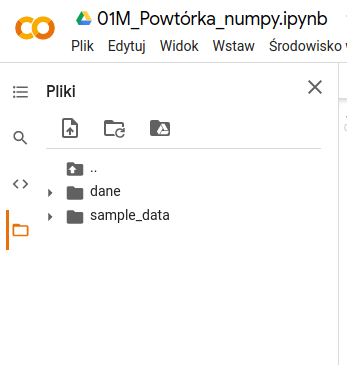

Niektóre dane są umieszczone w repozytorium github. W takiej sytuacji można sklonować repozytorium by mieć dostęp do danych w środowisku Colab.
Po sklonowaniu wygodnie jest utworzyć link do katalogu z danymi.

```
!git clone https://github.com/akalinow/Uczenie_maszynowe -b 2022_2023
!ln -s /content/Uczenie_maszynowe/dane/ dane
```

Tworzymy obiekt DataFrame podając:
* ścieżkę do danych
* format kodowania: `latin-1`
* definicję separatora kolumn: `;`

Po wczytaniu wypisujemy zniorcze informacje o zbiorze danych.

**Proszę:**:

* podać liczbę gmin w Polsce

In [ ]:
df = pd.read_csv("dane/poziom_wyszczepienia_mieszkańców_gmin_w_dniu_20210912_wskaźniki.csv", encoding='latin-1', sep=";")

print(df.describe())
print(df)

Wypisujemy nazwy kolumn, dodajemy kolumnę z procentem zaszczepionych (tak, ta kolumna już jest, ale robimy to w ramach ćwiczenia).
potem wybieramy tylko te kolumny, które są interesujące:

* ludność powiatu
* liczba zaszczepionych jedną dawką
* liczba zaszczepionych dwiema dawkami
* ułamek w pełni zaszczepionych

In [ ]:
print("Nazwy kolumn:",df.columns)
col1 = df["w1_zaszczepieni_pacjenci"]
col2 = df["liczba_ludnosci"]
df["ulamek_zaszczepionych"] = col1/col2
df_filtered = df[["liczba_ludnosci","w1_zaszczepieni_pacjenci", "w3_zaszczepieni_pelna_dawka","ulamek_zaszczepionych"]]

Narysujmy różne histogramy:
* ludności
* ludności z ograniczeniem do 100 000
* histogramy w skali logarytmicznej

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

label_setter = np.vectorize(lambda ax: [ax.set_xlabel('Ułamek zaszczepionych'), 
                                   ax.set_ylabel('Liczba gmin')])

df_over100k = df_filtered[df_filtered["liczba_ludnosci"]>0.1E6]

df_filtered["ulamek_zaszczepionych"].plot.hist(bins=20, ax = axes[0,0])
df_over100k["ulamek_zaszczepionych"].plot.hist(bins=20, ax=axes[0,1])

df_filtered["ulamek_zaszczepionych"].plot.hist(bins=20, ax = axes[1,0], logy=True)
df_over100k["ulamek_zaszczepionych"].plot.hist(bins=20, ax=axes[1,1], logy=True)

label_setter(axes);

Narysujmy dwuwymiarowy rozkład ułamka zaszczepionych względem liczby ludności:

In [ ]:
label_setter = np.vectorize(lambda ax: [ax.set_xlabel('Liczba ludności'), 
                                   ax.set_ylabel('Ułamek zaszczepionych')])

fig, axes = plt.subplots(2,2, figsize=(10,10))

df_filtered.plot(x="liczba_ludnosci", y="ulamek_zaszczepionych", ax=axes[0,0], kind = "scatter")
df_filtered.plot.hexbin(x="liczba_ludnosci", y="ulamek_zaszczepionych", ax=axes[0,1], gridsize = 30)

df_sub100k = df_filtered[df_filtered["liczba_ludnosci"]<0.1E6]
df_sub100k.plot(x="liczba_ludnosci", y="ulamek_zaszczepionych", ax=axes[1,0], kind = "scatter")
df_sub100k.plot.hexbin(x="liczba_ludnosci", y="ulamek_zaszczepionych", ax=axes[1,1], gridsize = 30)

label_setter(axes);

Załadujmy dodatkowe moduły by usyskać jeszcze ładniejsze rysunki

In [ ]:
import seaborn as sns

x = sns.jointplot(x="liczba_ludnosci", y="ulamek_zaszczepionych", data=df_sub100k, kind='hist')
x.set_axis_labels('Liczba ludności', 'Ułamek zaszczepionych', fontsize=16);

Na koniec uczyńmy rysunki interaktywnymi z użyciem biblioteki `plotly`:

In [ ]:
import plotly.express as px


fig = px.density_heatmap(df_sub100k, x="liczba_ludnosci", y="ulamek_zaszczepionych", marginal_x="histogram", marginal_y="histogram", labels={
                     "liczba_ludnosci": "Liczba ludności",
                     "ulamek_zaszczepionych": "Ułamek zaszczepionych"
                 })
fig.show()

Dane są bardzo rozmyte. Narysujmy medianę liczby zaszczepionych grupując gminy co 1k w liczbie mieszkańców.
Jako niepewność narysujmy odchylenie standardowe z próby, ale w wariancie obciążonym: 1/N zamiast 1/(N-1) - inaczej grupy gdzie jest tylko jedna gmina, N=1, dadzą 1/0.

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

df_group_1k = df_filtered.groupby((df_filtered["liczba_ludnosci"]/1000).round(0)).median()
error = df_filtered.groupby((df_filtered["liczba_ludnosci"]/1000).round(0)).std(ddof=0)

df_group_1k.plot(x="liczba_ludnosci", y="ulamek_zaszczepionych", ax=axes[0,0], kind = "scatter")
df_group_1k.plot.hexbin(x="liczba_ludnosci", y="ulamek_zaszczepionych", ax=axes[0,1], gridsize = 30)

df_group_1k = df_group_1k[df_group_1k["liczba_ludnosci"]<60000]
df_group_1k.plot(x="liczba_ludnosci", y="ulamek_zaszczepionych", yerr=error, ax=axes[1,0], kind = "scatter")
df_group_1k.plot.hexbin(x="liczba_ludnosci", y="ulamek_zaszczepionych", ax=axes[1,1], gridsize = 30)

label_setter(axes);

# Zadanie domowe

**Proszę:**

* wczytać dane zawarte w pliku ```dane/miesieczne_wskazniki_cen_towarow_i_uslug_konsumpcyjnych_od_1982_roku.csv```
* narysować wykres poziomu inflacji w pełnym zakresie dat
* narysować wykres inflacji w zakresie od 2010-01-01 do 2022-09-01
* znależć i wypisać na ekran miesiąc o największej notowanej inflacji, oraz wartość inflacji w tym miesiącu

In [ ]:
#BEGIN_SOLUTION
import datetime

fileName = "dane/miesieczne_wskazniki_cen_towarow_i_uslug_konsumpcyjnych_od_1982_roku.csv"
df = pd.read_csv(fileName, encoding="Windows-1250", sep=";", decimal=",", parse_dates={"Data":["Rok","Miesiąc"]})
df = df[df["Sposób prezentacji"] =="Analogiczny miesiąc poprzedniego roku = 100"]
df = df.reset_index()

fig, axes = plt.subplots(1,2, figsize=(10,7))
axes[0].plot(df["Data"], df["Wartość"], "bo");
axes[0].set_xlabel("Data")
axes[0].set_ylabel("Analogiczny miesiąc poprzedniego roku = 100")

axes[1].plot(df["Data"], df["Wartość"], "go");
axes[1].set_xlabel("Data")
axes[1].set_ylabel("Analogiczny miesiąc poprzedniego roku = 100")
axes[1].set_xlim(datetime.date(2011, 1, 1), datetime.date(2022, 12, 1))
axes[1].set_ylim((95,115));

from matplotlib import dates
axes[1].xaxis.set_major_locator(dates.YearLocator(base=2))

max_value_index = np.argmax(df["Wartość"])
date = df["Data"][max_value_index].strftime("%B %Y")
value = df["Wartość"][max_value_index]
#END_SOLUTION
print("Miesiąc o największej inflacji:",date)
print("Inflacja względem analogicznego miesiąca roku poprzedniego:",value)